# Hypothesis Testing in Python Made Easy

## Introduction
In this excellent article ... https://medium.com/analytics-vidhya/everything-you-should-know-about-p-value-from-scratch-for-data-science-f3c0bfa3c4cc ... the author explores the p-value in statistics and uses the example of an archery team to compare  two distributions.

I found this article very insightful but I was left wanting more in that I wanted the statistics breaking down into simple steps that a non-statistician could follow and I wanted to see the full python code that explored the datasets to see if the archery team had improved or not.

With that in mind I invented my own scenario based on some fictitous, normally distributed data so that I could build a Python / Jupyter example up in simple steps.

<img src="images/LaptopOnKnee.png">

# The Problem
A teacher has historically been delivering their curriculum by standing in front of their class and teaching their students. The teacher has been explaining the material each week using PowerPoint slides and then setting questions for the students to solve during the class to demonstrate if learning has taken place.

However, the COVID-19 crisis has forced the introduction of social distancing in the classroom meaning that the class has had to be split into two equal groups that cannot be taught at the same time.

To solve this problem the teacher converts the course into online delivery and then teaches half of the class using the traditional classroom-based approach and the other half remotely and online.

At the end of term the teacher sets an equivalent test for each group and records the scores. The teacher also records the attendance of each group.

The teacher notices that the classroom vs. online groups exhibit different scores for their tests and their attendance, but wonders of these differences are statistically significant or just a matter of luck (as the sample size is quite small).

<img src="images/computers.jpg">

## The Data
The data for the end-of term tests looks like this ...

|  | Classroom-Taught Group | Online-Taught Group |
| --- | --- | --- |
| Mean (Average) Test Score | 74.0% | 76.7% |
| Standard Deviation of Test Score | 5% | 8% |
| Observations (No of Students in Group) | 30 | 30 |

... and the attendance data looks like this ...

|  | Classroom-Taught Group | Online-Taught Group |
| --- | --- | --- |
| Mean (Average) Attendance | 85.0% | 83.0% |
| Standard Deviation of Attendance | 5% | 7% |
| Observations (No of Register Marks Recorded) | 100 | 100 |



## First Impressions
Well, it doesn't look like the test scores have gone up by much, they have increased by 2.7% from 74% to 76.7%.

Also it looks like attendance has decreased for the online group by 2% from 85% to 83%.

Does this mean that the online delivery has been a failure and that a way should be found of teaching both groups using traditional classroom teaching?

Let's find out ...

## Applying Some Data Science
In the original article the author jumped in with a z score and a p-value, but the statistics quickly lost me and in any case there was no python code to walk me through it step-by-step, so I thought I would expand on this excellent article in those respects.

## Exploring the Data
So, I thought I would start by using Python to generate some data for me to represent the two data sets, as it is much easier to visualise it once you can see it.

Let us start by importing some libraries and setting the random seed so that our results are reproducible ...

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

Now let's have a first look at our data sets which we have assumed are normally distributed.

In statistics-speak a normal distribution is defined as follows ...
$$N(\mu, \sigma^2)$$

... which just means a normal distribution that has a mean represented by the greek symbol mu ($\mu$) and a variance represented by the greek symbol sigma sqaured ($\sigma^2$).

Note that the standard deviation ($\sigma$) is simply the variance squared and hence the standard deviation is the square root of the variance.

So our data sets can be defined as -

- Classroom taught test scores = $N(74, 5^2)$
- Online taught test scores = $N(76.7, 8^2)$


- Classroom taught attendance = $N(85, 5^2)$
- Online taught test scores = $N(83, 7^2)$

We can now generate some sample data that matches this in Python as follows -

In [2]:
mu_classroom_test = 74
sigma_classroom_test = 5
n_classroom_test = 30

mu_online_test = 76.7
sigma_online_test = 8
n_online_test = 30

In [3]:
np.random.seed(42)

# Note that there are 3 common methods for generating normally distributed data in Python.
# To demystify this I have given an example of each ...
classroom_test_scores_np_randn = sigma_classroom_test * np.random.randn(n_classroom_test) + mu_classroom_test # sigma * np.random.randn(...) + mu
classroom_test_scores_np_normal =np.random.normal(loc=mu_classroom_test, scale=sigma_classroom_test, size = n_classroom_test)
classroom_test_scores_sp_rvs = stats.norm.rvs(loc=mu_classroom_test, scale=sigma_classroom_test, size = n_classroom_test)

However, as scipy is the common choice for statistics in Python I settled on this method to generate our test data ...

In [4]:
np.random.seed(42)

classroom_test_scores = stats.norm.rvs(loc=mu_classroom_test, scale=sigma_classroom_test, size = n_classroom_test)
online_test_scores = stats.norm.rvs(loc=mu_online_test, scale=sigma_online_test, size = n_online_test)

Let's take a quick look at the data that has been generated ...

In [5]:
classroom_test_scores

array([76.48357077, 73.30867849, 77.23844269, 81.61514928, 72.82923313,
       72.82931522, 81.89606408, 77.83717365, 71.65262807, 76.71280022,
       71.68291154, 71.67135123, 75.20981136, 64.43359878, 65.37541084,
       71.18856235, 68.9358444 , 75.57123666, 69.45987962, 66.93848149,
       81.32824384, 72.8711185 , 74.33764102, 66.87625907, 71.27808638,
       74.55461295, 68.24503211, 75.87849009, 70.99680655, 72.54153125])

In [6]:
online_test_scores

array([71.8863471 , 91.51822548, 76.5920222 , 68.23831257, 83.2803593 ,
       66.9332508 , 78.37090876, 61.02263901, 66.07451161, 78.27488989,
       82.60773264, 78.07094625, 75.77481374, 74.29117044, 64.87182408,
       70.94124633, 73.01488983, 85.15697781, 79.44894632, 62.59567876,
       79.29267176, 73.61934176, 71.284624  , 81.59341031, 84.94799618,
       84.15024095, 69.98625981, 74.22630099, 79.35010745, 84.50436102])

Now let's look at it visually ...

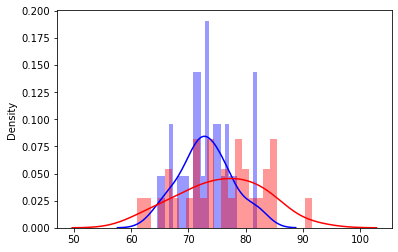

In [7]:
sns.distplot(classroom_test_scores, bins=25, kde=True, color='blue')
sns.distplot(online_test_scores, bins=25, kde=True, color='red')
plt.show()

Interestingly, it doesn't look very normally distributed does it? That is because of the limited number of samples. The bigger the sample size (n) the more the generated (or real world) data will resemble a pure normal distribution, but we have limited data points in our samples and that is why it looks a bit odd.

We can visualise a true normal distribution using out means and standard deviations as follows -

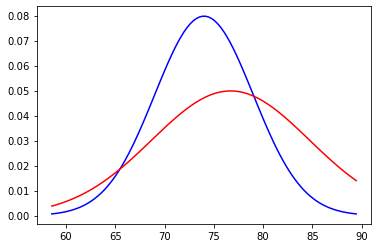

In [8]:
normal_before = stats.norm(loc=mu_classroom_test, scale=sigma_classroom_test) # Generate a normal continuous random variable with mean 74 and standard deviation 8
normal_after = stats.norm(loc=mu_online_test, scale=sigma_online_test) # Generate a normal continuous random variable with mean 78 and standard deviation 5
x = np.linspace(normal_before.ppf(0.001), normal_before.ppf(0.999), 100) # Generate an x axis with 100 points from 0.1% along the x axis to 99.9% along the x axis
sns.lineplot(x,normal_before.pdf(x), color="blue") # Plot the "before" normal distribution
sns.lineplot(x,normal_after.pdf(x), color="red") # Plot the "after" normal distribution
plt.show()

Also when we consider the two distributions (from the generated data) visually our intuition is telling us that the online test scores (the red distribution) is higher than the classroom based test scores (the blue distribution) as there is a greater area underneath the right hand side of the red graph.

## Understanding the means in our datasets
So clearly our data is not completely accurate because of the limited number of data in each set. We have just 30 data points for the classroom taught test and 30 for the online taught test.

What are the true averages (means / $\mu$). This is where confidence intervals come in.

Confidence intervals are described using a terrifying formula, but it is not that complicated when it is broken down and it is easy to implement with an example in Python.

Brace yourself, here is the formula -

$$CI = \bar{x} \pm Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$$

All this is saying is that the confidence interval is equal to the sample mean ($\bar{x}$) plus or minus something called the z score ($Z_{\alpha/2}$) multiplied by the standard deviation ($\sigma$) divided by the square root of the sample size ($\sqrt{n}$).

If that still looks scary, it is easily explained with examples.

The "z score" is just the distance from the mean measured in the number of standard deviations. 

The table below depicts the z-scores necessary for calculating the most commonly used confidence intervals (90%, 95%, and 99%). 

| CI  | Z-Score |
|-----|---------|
| 90% | 1.645   |
| 95% | 1.96    |
| 99% | 2.575   |

Alternatively, the z-score can easily be calculated using a little bit of Python -

In [9]:
print(f"z-score for 90% along the x axis is {round(stats.norm.interval(0.90)[1],3)}")
print(f"z-score for 95% along the x axis is {round(stats.norm.interval(0.95)[1],3)}")
print(f"z-score for 99% along the x axis is {round(stats.norm.interval(0.99)[1],3)}")

z-score for 90% along the x axis is 1.645
z-score for 95% along the x axis is 1.96
z-score for 99% along the x axis is 2.576


... and you can visualise what is going on in this diagram. Tthe confidence level of 90%, 95% or 99% is shown across the top and the (magical!) z-score is shown along the x axis measured in the number of standard deviations away from the mean (the centre of the graph) -

<img src="images/Conf_interval - GH2.png">

Armed with all of this statistical know-how we can make a statement about the upper and lower range of both of our means with a particular confidence level, for example ...

In [10]:
stats.norm.interval(0.95, loc=np.mean(classroom_test_scores), scale=stats.sem(classroom_test_scores))

(71.4489792915286, 74.669551749961)

In [11]:
stats.norm.interval(0.99, loc=np.mean(classroom_test_scores), scale=stats.sem(classroom_test_scores))

(70.94299068659794, 75.17554035489167)

This is saying that we can be 95% sure that the true mean of the classroom test scores lies between 71.4 % and 74.7% and we can be 99% sure that the true mean of the classroom test scores lies between 70.9 % and 75.1% (as we increase the confidence level the range will increase - the minimum will get smaller and the maximum larger).

Interesting!

Now let's take a look at the online test scores ...

In [12]:
stats.norm.interval(0.95, loc=np.mean(online_test_scores), scale=stats.sem(online_test_scores))

(73.0652240783914, 78.39617639696951)

In [13]:
stats.norm.interval(0.99, loc=np.mean(online_test_scores), scale=stats.sem(online_test_scores))

(72.22767076715732, 79.23372970820358)

At both the 95% and 99% confidence interval the range of the means of the classroom test and the online test overlaps (71.4% - 74.7% overlaps with 73.1% - 78.4%).

Given that these ranges overlap it could possibly be the case that the classroom and online test results have not changed and we just got lucky (or unlucky) with our sampling.

We now need to do a bit more work to investigate this is more detail.

## Hypothesis Testing
Hypothesis testing uses statistics to test whether anything statistically significant has changed or not i.e. are our two distributions different because of luck or are they really different?

A null hypothesis ($H_0$) is put forward which states that nothing has changed and an alternative hypothesis ($H_1$ or $H_A$) is proposed indicating that something of interest has changed. 

If the alternative hypothesis is looking for a new state that is either greater than or less than the old state this is called a "one tailed test". If it is just looking for a difference regardless of whether it is less than or greater than this is called a "two tailed test".

For our test scores, our hypotheses are as follows -

$H_0$: The two groups (classroom and online) are scoring the same in their tests; nothing has changed

$H_A$: The new online teaching method has improved learning and the test scores in the online group are higher than in the classroom group

We can visualise the hypothesis test as follows -

<img src="images/TandP.png">

Here is what it means ...

First we pick the confidence level we want for our results. It is common to pick 95% confidence although we can pick 90%, 99% or some other value. The only hard-and-fast rule is to select the confidence level before carrying out any calculations; we must not adjust our results retrospectively just to get a result we wanted or were predisposed towards.

When we have picked it, let's say we have gone for 95% confidence, we then calculate the alpha value ($\alpha$) which is simply 1 - the confidence level so for 95% confidence the alpha value is 0.05.

In the graph above an alpha of 0.05 is represented by the yellow shaded area (note: it includes the green shading which is on top of the yellow). 

A statistical calculation is then used to calculate the p-value represented by the green shaded area.

If the p_value is less than the alpha value (i.e. if the green area is to the left of the yellow) we can reject the null hypothesis (that nothing has changed) and instead accept the alternative hypothesis with the chosen level of confidence.

One last note: If we have a one-tailed test the p_value generated by the statistical calculation must be divided by 2 as the calculation generates the p-value for both ends of the distribution i.e. it defaults to a two-tailed test.

It all sounds much more complicated than it is so let's use our test scores as an example to see just how easy this is in Python ...

### Hypothesis Testing for the Test Scores
$H_0:$  The test scores for the classroom and online groups have not changed

$H_a:$  The test scores for the online group are higher than the test scores for the classroom-based group

In [14]:
t_statistic, p_value = stats.ttest_ind(classroom_test_scores, online_test_scores)
t_statistic, p_value

(-1.681343244117311, 0.09807408179921107)

In order to interpret the results I am going to write a small function that I can re-use. It is a bit more verbose than the coding style I would usually adopt but I wanted to maximise the readability ...

In [15]:
def reject_null_hypothesis(p_value, two_tailed = False, alpha_value=0.05, print_result=True):
    if two_tailed == True:
        reject = p_value < alpha_value
    else:
        reject = (p_value / 2) < alpha_value
    
    if print_result:
        print(f"two_tailed = {two_tailed}")
        if two_tailed == True:
            print(f"p_value = {p_value:.9f}")
        else:
            print(f"(p_value / 2) = {p_value / 2:.9f}")
        print(f"alpha_value={alpha_value}")
        
        if reject == True:
              print(f"The null hypothesis can be rejected with {(1-alpha_value):.0%} confidence and the alternative hypothesis can be accepted")
        else:
              print(f"The null hypothesis cannot be rejected with {(1-alpha_value):.0%} confidence")
              
    return reject

In [16]:
reject_null_hypothesis(p_value)

two_tailed = False
(p_value / 2) = 0.049037041
alpha_value=0.05
The null hypothesis can be rejected with 95% confidence and the alternative hypothesis can be accepted


True

This result tells us that we can reject the null hypothesis (that nothing has changed) and that with 95% confidence we can accept the alternative hypothesis i.e. that the test scores for the online group are higher than the test scores for the classroom based group.

What about our attendance though? It looked like attendance had declined for the online group.

We had better see whether this apparent decline was statistically significant or not.

### Hypothesis Testing for Attendance

<img src="images/attendance2.jpg" width=700>

$H_0:$  The attendance for the classroom and online groups have not changed

$H_a:$  The attendance for the online group is lower than the attendance for the classroom-based group

In [17]:
np.random.seed(42)

mu_classroom_attendance = 85
sigma_classroom_attendance = 5
n_classroom_attendance = 100

mu_online_attendance = 83
sigma_online_attendance = 7
n_online_attendance = 100

classroom_attendance = stats.norm.rvs(loc=mu_classroom_attendance, scale=sigma_classroom_attendance, size=n_classroom_attendance)
online_attendance = stats.norm.rvs(loc=mu_online_attendance, scale=sigma_online_attendance, size=n_online_attendance)

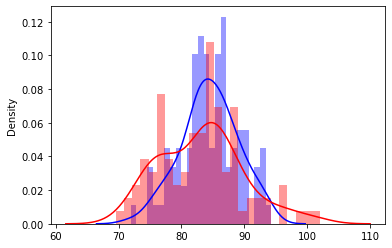

In [18]:
sns.distplot(classroom_attendance, bins=25, kde=True, color='blue')
sns.distplot(online_attendance, bins=25, kde=True, color='red')
plt.show()

In [19]:
t_statistic, p_value = stats.ttest_ind(classroom_attendance, online_attendance)
t_statistic, p_value

(1.6406874755230665, 0.10244989280783035)

In [20]:
reject_null_hypothesis(p_value)

two_tailed = False
(p_value / 2) = 0.051224946
alpha_value=0.05
The null hypothesis cannot be rejected with 95% confidence


False

So, the null hypothesis cannot be rejected and we must accept, with 95% confidence, that the attendance has not changed and is not lower for the online group than for the classroom-taught group.

# Conclusion
Well, isn't that interesting?!

For starters the statistics and maths around confidence intervals for means and hypothesis testing turns out to be fairly straight-forward, especially when we realise that it can all be achieved in just a few lines of Python in a Jupyter notebook.

Secondly we have worked through an example to show just how easy and also how important it is to apply some theory and not to rely solely on intuition.

Using intuition alone we may have concluded that the test scores have not increased for online learning and that student attendance was worse.

However, when we applied the statistics and data science and by using confidence intervals and hypothesis testing we were able to conclude the following (with 95% confidence) -

- The test results of the online group are higher than the test results for the classroom taught group
- The attendance of the online group is not lower than the attendance of the classroom taught group

If this were a real world example I would be tempted to increase and not decrease the amount of online learning as based on the metrics we have considered the student outcomes have improved.

Again if this were a real world example I would want to increase the sample size, make sure that all other factors were equal, collect some qualitative data from students (like surveys results) and look for other relevant metrics like student mental health and wellbeing etc.

I would conclude (again if this were a real world example) that contrary to my initial intuitive view (based on a quick look at the charts) there are benefits to student outcomes of online learning over the classroom equivalent that should be explored in more detail and if possible exported to other courses and curriculum areas.